In [1]:
import glob
import random
import base64
import pandas as pd

from PIL import Image
from io import BytesIO
from IPython.display import HTML
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
traindf=pd.read_csv('../dog-breed-identification/labels.csv')
testdf=pd.read_csv('../dog-breed-identification/sample_submission.csv')
testdf.fillna(0, inplace=True)

In [3]:
traindf.isnull().values.any()

False

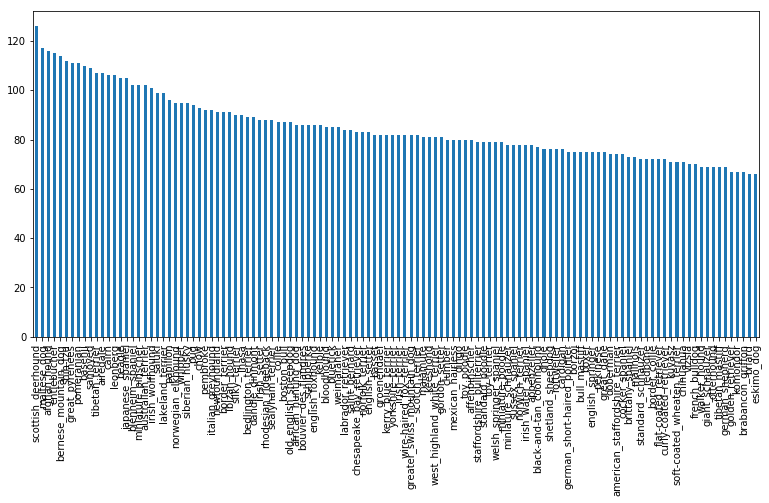

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(13, 6))
traindf['breed'].value_counts().plot(kind='bar')
plt.show()

In [5]:
traindf.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [6]:
def class_percentages(labels):
    class_map={}
    for i in labels:
        if str(i) not in class_map:
            class_map[str(i)]=1
        else:
            class_map[str(i)]+=1
    #     print(class_map)
    return class_map

p=class_percentages(traindf.breed.values)
# print(p)
# for i in p.items():
#     print(i)

print("Class with maximum images-"+str(max(p, key=p.get))+"  "+str(p[max(p, key=p.get)]))
print("Class with maximum images-"+str(min(p,key=p.get)) +"  "+str(p[min(p, key=p.get)]))

Class with maximum images-scottish_deerhound  126
Class with maximum images-eskimo_dog  66


In [7]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 224
datagen = ImageDataGenerator(preprocessing_function=preprocess_input, 
                             rescale=1./255.,
                             horizontal_flip=True,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             validation_split=0.2)

In [8]:
train_generator=datagen.flow_from_dataframe(
                        dataframe=traindf,
                        directory="../dog-breed-identification/train/",
                        x_col="id",
                        y_col="breed",
                        has_ext=False,
                        subset="training",
                        batch_size=32,
                        seed=50,
                        shuffle=True,
                        class_mode="categorical",
                        target_size=(image_size, image_size))

Found 0 images belonging to 0 classes.


In [9]:
valid_generator=datagen.flow_from_dataframe(
                        dataframe=traindf,
                        directory="../dog-breed-identification/train/",
                        x_col="id",
                        y_col="breed",
                        has_ext=False,
                        subset="validation",
                        batch_size=1,
                        seed=42,
                        shuffle=True,
                        class_mode="categorical",
                        target_size=(image_size, image_size))

Found 0 images belonging to 0 classes.


In [10]:
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
                            dataframe=testdf,
                            directory="../dog-breed-identification/test/",
                            x_col="id",
                            y_col=None,
                            has_ext=False,
                            batch_size=1,
                            seed=42,
                            shuffle=False,
                            class_mode=None,
                            target_size=(image_size, image_size))

Found 0 images.
